In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
#from pytrends.request import TrendReq

In [4]:
# who is in space right now
r = requests.get(url = "http://api.open-notify.org/astros.json")
r.json()

{'people': [{'name': 'Andrew Morgan', 'craft': 'ISS'},
  {'name': 'Oleg Skripochka', 'craft': 'ISS'},
  {'name': 'Jessica Meir', 'craft': 'ISS'},
  {'name': 'Chris Cassidy', 'craft': 'ISS'},
  {'name': 'Anatoly Ivanishin', 'craft': 'ISS'},
  {'name': 'Ivan Vagner', 'craft': 'ISS'}],
 'message': 'success',
 'number': 6}

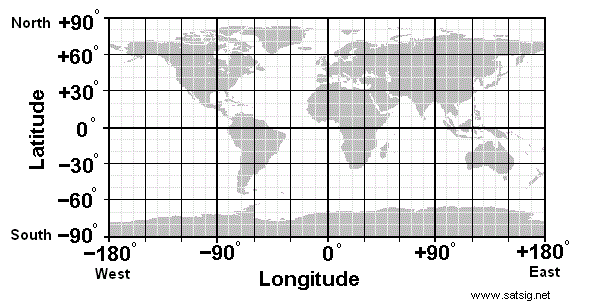

In [10]:
# http://www.satsig.net/lat_long.htm
Image(filename = 'world.gif', width = '100%')

In [52]:
# location of ISS
r = requests.get(url = "http://api.open-notify.org/iss-now.json")
iss_location = (r.json())
print( iss_location)

&&&
{'message': 'success', 'timestamp': 1586777318, 'iss_position': {'latitude': '31.5919', 'longitude': '85.2816'}}


Text(0.5, 1.0, 'International Space Station Location')

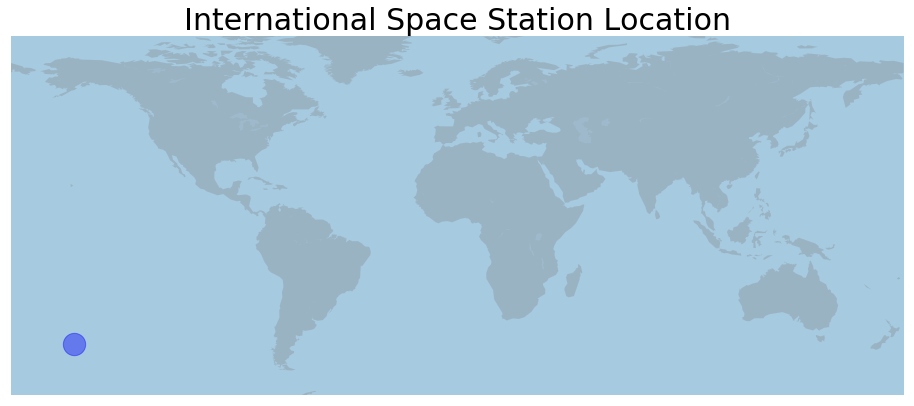

In [10]:
# lets plot the ISS location
from mpl_toolkits.basemap import Basemap

# dimensions of the figure
plt.figure(figsize=(16, 8))

# make the background map
m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color = '#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0, color='white')

m.scatter(float(iss_location['iss_position']['longitude']),
          float(iss_location['iss_position']['latitude']), 
          s=500, alpha=0.4, color='blue')

plt.title('International Space Station Location' , fontsize=30) 

In [1]:
import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
date_to_print

'20200413141608'

In [12]:
# collect data - try to let it run
record_data = True
if record_data == True :
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
        
    import time
    starttime = time.time()
        
    space_station_data = []
    while True :
        r = requests.get(url = 'http://api.open-notify.org/iss-now.json')
        iss_location = (r.json())
        print(iss_location)
            
        space_station_data.append([iss_location['timestamp'],
                                   iss_location['iss_position']['latitude'],
                                   iss_location['iss_position']['longitude']
                                ])
            
        # dump copy to file
        tmp_space_station_date_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude','longitude'])
        tmp_space_station_date_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
            
        # safety break
        if len(space_station_data) > 18000 :
            break;
                
        # let it sleep 60 seconds
        time.sleep(60.0 - ((time.time() - starttime)%60.0))
                

{'message': 'success', 'timestamp': 1586768439, 'iss_position': {'latitude': '-49.3229', 'longitude': '-95.1225'}}
{'message': 'success', 'timestamp': 1586768499, 'iss_position': {'latitude': '-48.0098', 'longitude': '-89.8559'}}
{'message': 'success', 'timestamp': 1586768559, 'iss_position': {'latitude': '-46.4601', 'longitude': '-84.9289'}}
{'message': 'success', 'timestamp': 1586768619, 'iss_position': {'latitude': '-44.6740', 'longitude': '-80.2695'}}
{'message': 'success', 'timestamp': 1586768680, 'iss_position': {'latitude': '-42.6555', 'longitude': '-75.8493'}}
{'message': 'success', 'timestamp': 1586768739, 'iss_position': {'latitude': '-40.5520', 'longitude': '-71.8984'}}
{'message': 'success', 'timestamp': 1586768799, 'iss_position': {'latitude': '-38.2465', 'longitude': '-68.1201'}}
{'message': 'success', 'timestamp': 1586768859, 'iss_position': {'latitude': '-35.8112', 'longitude': '-64.5958'}}
{'message': 'success', 'timestamp': 1586768919, 'iss_position': {'latitude': '-3

KeyboardInterrupt: 

In [14]:
[dt+4 for dt in [1, 2, 3]]

[5, 6, 7]

In [24]:
# visualize the historical data

# load hisatorical data
iss_flight_record = pd.read_csv('ISS_location_20200413143018.csv')

# TRANSLATE TIMESTAMP INTO READABLE
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']]

# add a plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)

iss_flight_record['date'] = date_time
iss_flight_record.head()


,timestamp,latitude,longitude,index,date
0,1586768439,-49.3229,-95.1225,1,2020-04-13 14:30:39
1,1586768499,-48.0098,-89.8559,2,2020-04-13 14:31:39
2,1586768559,-46.4601,-84.9289,3,2020-04-13 14:32:39
3,1586768619,-44.6740,-80.2695,4,2020-04-13 14:33:39
4,1586768680,-42.6555,-75.8493,5,2020-04-13 14:34:40


In [22]:
date_time

[datetime.datetime(2020, 4, 13, 14, 30, 39),
 datetime.datetime(2020, 4, 13, 14, 31, 39),
 datetime.datetime(2020, 4, 13, 14, 32, 39),
 datetime.datetime(2020, 4, 13, 14, 33, 39),
 datetime.datetime(2020, 4, 13, 14, 34, 40),
 datetime.datetime(2020, 4, 13, 14, 35, 39),
 datetime.datetime(2020, 4, 13, 14, 36, 39),
 datetime.datetime(2020, 4, 13, 14, 37, 39),
 datetime.datetime(2020, 4, 13, 14, 38, 39),
 datetime.datetime(2020, 4, 13, 14, 39, 39)]

Text(0.5, 1.0, 'International Space Station Location')

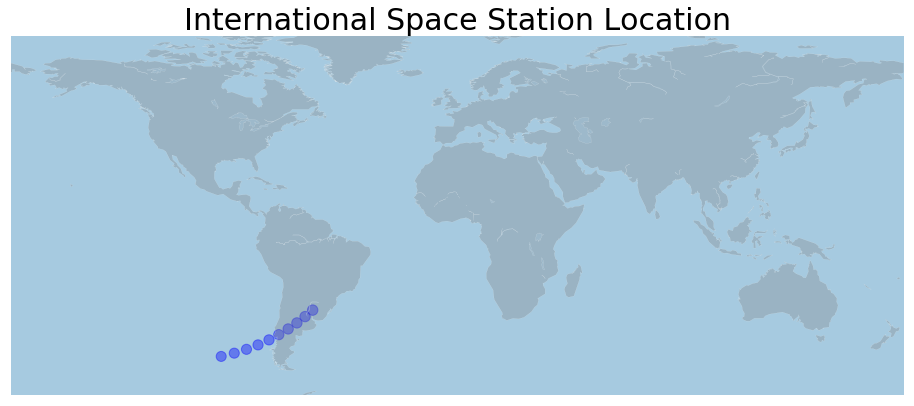

In [29]:
# lets plot the ISS location
from mpl_toolkits.basemap import Basemap

# dimensions of the figure
plt.figure(figsize=(16, 8))

# make the background map
m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color = '#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color='white')

m.scatter(iss_flight_record['longitude'],
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'], alpha=0.4, color='blue')

plt.title('International Space Station Location' , fontsize=30) 

In [30]:
# lets model the ISS data
tmp_df = iss_flight_record.tail(10) 
tmp_df

,timestamp,latitude,longitude,index,date
0,1586768439,-49.3229,-95.1225,1,2020-04-13 14:30:39
1,1586768499,-48.0098,-89.8559,2,2020-04-13 14:31:39
2,1586768559,-46.4601,-84.9289,3,2020-04-13 14:32:39
3,1586768619,-44.6740,-80.2695,4,2020-04-13 14:33:39
4,1586768680,-42.6555,-75.8493,5,2020-04-13 14:34:40
5,1586768739,-40.5520,-71.8984,6,2020-04-13 14:35:39
6,1586768799,-38.2465,-68.1201,7,2020-04-13 14:36:39
7,1586768859,-35.8112,-64.5958,8,2020-04-13 14:37:39
8,1586768919,-33.2645,-61.3011,9,2020-04-13 14:38:39
9,1586768979,-30.6448,-58.2357,10,2020-04-13 14:39:39


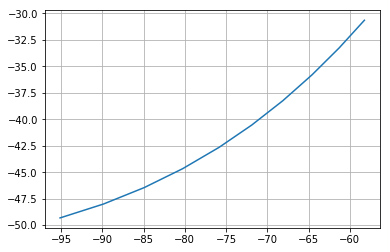

In [31]:
plt.plot(tmp_df['longitude'], tmp_df['latitude'])
plt.grid()

In [33]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)


intercept:  -3.0661580873678176
slope:  0.5051869333356463


In [35]:
# predict longitude 1 periods out
import numpy as np
predicted_latitude = np.ceil(intercept + slope*(-55))

print('Next predicted point: ', predicted_latitude)

Next predicted point:  -30.0


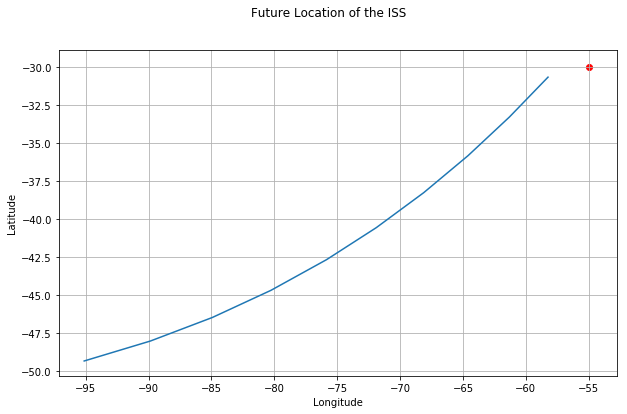

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(tmp_df['longitude'], tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([-55], [predicted_latitude], color='red')

In [45]:
# polynomial regression
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x,y,3))

predicted_latitude = poly_regression(-55)

print('Next predicted point: ', predicted_latitude)

Next predicted point:  -27.622845214130294


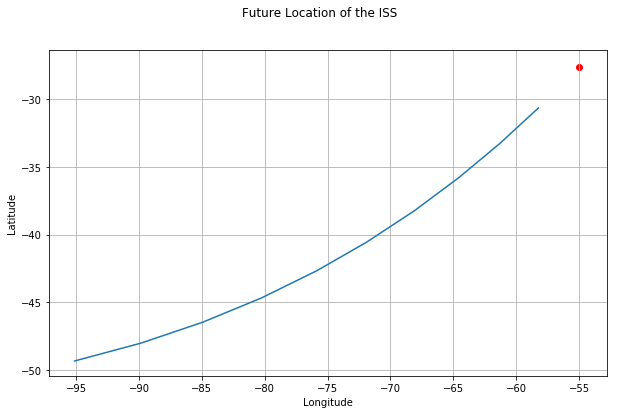

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(tmp_df['longitude'], tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([-55], [predicted_latitude], color='red')

In [48]:
# flask_app.py
from flask import Flask, render_template, flash, request, jsonify, Markup
import os, sys, io, base64
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

# global variable
app = Flask(__name__)

# get path directory
BASE_DIR = os.path.dirname(os.path.abspath(__file__))

# get the location of ISS
def get_space_station_location() :
    
    space_station_longitude = None
    space_station_latitude = None
    
    try :
        r = requests.get(url = "http://api.open-notify.org/iss-now.json")
        iss_location = (r.json())
        
        space_station_longitude = float(iss_location['iss_position']['longitude'])
        space_station_latitude = float(iss_location['iss_position']['latitude'])
    
    except :
        # log error
        print("Request not working")
    
    return(space_station_longitude, space_station_latitude)    
        

    
def translate_geo_to_pixels(longitude, latitude, max_x_px, max_y_px) :
    # y = -90 to 90
    # x = 180 to 180
    scale_x = abs(((longitude + 180) / 360) * max_x_px)
    scale_y = abs(((latitude - 90) / 180) * max_y_px) 
    
    return scale_x, scale_y



@app.route("/", methods = ['POST', 'GET'])
def ISS_Tracker() :
    
    # set on initial plot size
    plt.figure(figsize=(16,8))
    
    # load image from web server
    img = os.path.join(BASE_DIR, 'world-map-background.png')
    img = plt.imread(img)
    img = plt.imshow(img)
    
    if request.method == 'POST' :
        # get the location of the ISS
        iss_location = get_space_station_location()
        
        # translate the geo-coordinates to pixels
        translated_iss_location = translate_geo_to_pixels(
            iss_location[0],
            iss_location[1],
            2000, 1000)
        
        # add position to plot
        plt.scatter(x = [translated_iss_location[0]], y = [translated_iss_location[1]],
                   c = 'blue', s=500, marker="P")
        
    plt.axis('off')
    img = io.BytesID()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()
    
    return render_template('locate-iss.html',
        forecast_plot = Markup('<img src="data:image/png;base64,{}" style="width=100%; vertical-align:top">'.format(plot))
        )

if __name__ == '__main__' :
    app.run(debug=True)
    
    

NameError: name '__file__' is not defined

In [61]:
def get_space_station_location() :
    
    space_station_longitude = None
    space_station_latitude = None
    
    try :
        r = requests.get(url ='http://api.open-notify.org/iss-now.json')
        iss_location = (r.json())
        print(iss_location)

        space_station_longitude = float(iss_location['iss_position']['longitude'])
        space_station_latitude = float(iss_location['iss_position']['latitude'])
    
    except :
        # log error
        print("Request not working")
    
    return(space_station_longitude, space_station_latitude)

get_space_station_location()

{'message': 'success', 'timestamp': 1586777660, 'iss_position': {'latitude': '15.4167', 'longitude': '100.3689'}}


(100.3689, 15.4167)